**DBSCAN CLUSTERING – FRAUD / ANOMALY DETECTION**

 ____  ____ ____   ____    _    _   _   _____ ____      _   _   _ ____  
|  _ \| __ ) ___| / ___|  / \  | \ | | |  ___|  _ \    / \ | | | |  _ \ 
| | | |  _ \___ \| |     / _ \ |  \| | | |_  | |_) |  / _ \| | | | | | |
| |_| | |_) |__) | |___ / ___ \| |\  | |  _| |  _ <  / ___ \ |_| | |_| |
|____/|____/____/ \____/_/   \_\_| \_| |_|   |_| \_\/_/   \_\___/|____/ 
                                                                        
 ____  _____ _____ _____ ____ _____ ___ ___  _   _ 
|  _ \| ____|_   _| ____/ ___|_   _|_ _/ _ \| \ | |
| | | |  _|   | | |  _|| |     | |  | | | | |  \| |
| |_| | |___  | | | |__| |___  | |  | | |_| | |\  |
|____/|_____| |_| |_____\____| |_| |___\___/|_| \_|
                                                   

   Transaction_Amount  Transaction_Frequency
0            4.809127               1.765526
1            4.959175               1.142410
2           -2.515946               8.485431
3            4.913428               1.872073
4            4.784766   

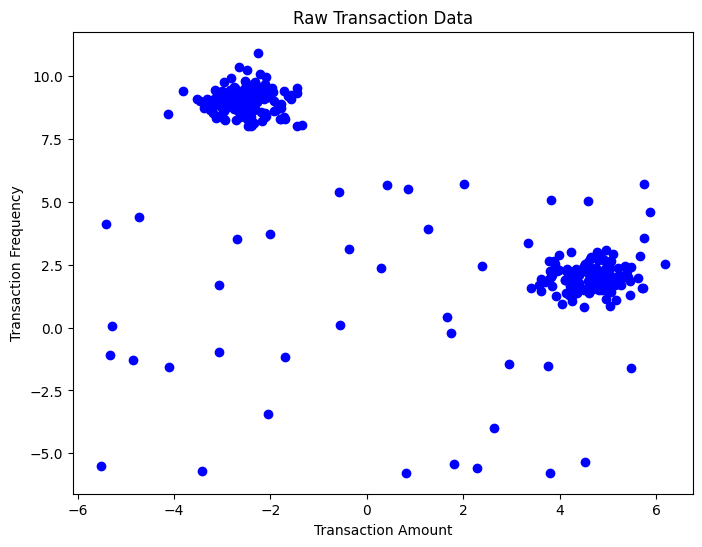

Cluster Value Counts:
Cluster
 0    164
 1    150
-1     21
 2      5
Name: count, dtype: int64


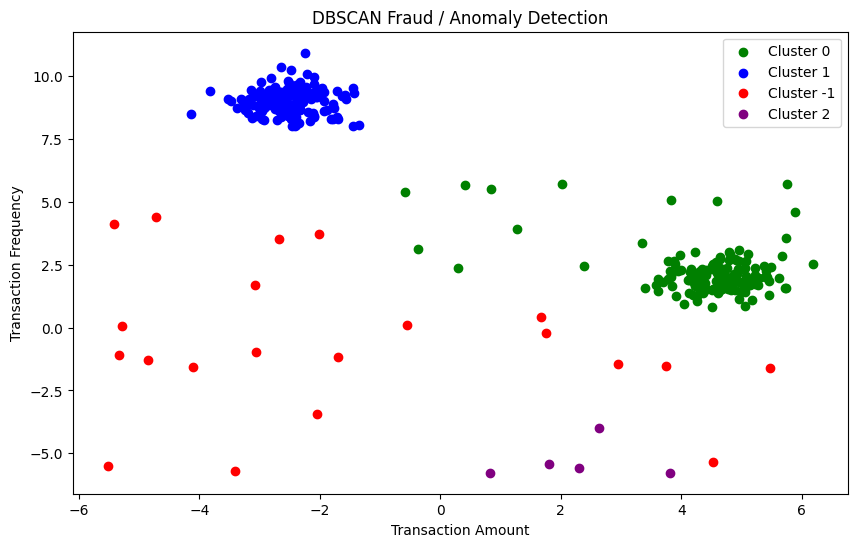


🚨 FRAUD / ANOMALY TRANSACTIONS 🚨

     Transaction_Amount  Transaction_Frequency  Cluster
301            3.754195              -1.546733       -1
302           -2.049646              -3.432671       -1
303           -3.408529              -5.708291       -1
310            1.752014              -0.220542       -1
313           -2.016380               3.744187       -1
314           -2.683098               3.523119       -1
315           -4.726387               4.386238       -1
317            5.480887              -1.619338       -1
319           -1.694957              -1.182727       -1
320           -3.067498               1.711107       -1
321           -4.855523              -1.306938       -1
322           -0.557437               0.090761       -1
327           -4.111014              -1.585660       -1
328           -5.411922               4.122647       -1
329            4.529346              -5.346993       -1
331           -5.276625               0.074756       -1
332          

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

import pyfiglet

banner = pyfiglet.figlet_format("DBSCAN FRAUD DETECTION")
print(banner)

# Create normal transaction clusters
X_normal, _ = make_blobs(
    n_samples=300,
    centers=2,
    cluster_std=0.5,
    random_state=42
)

# Create anomaly / fraud points
X_fraud = np.random.uniform(low=-6, high=6, size=(40, 2))

# Combine data
X = np.vstack([X_normal, X_fraud])

# Convert to DataFrame
df = pd.DataFrame(X, columns=["Transaction_Amount", "Transaction_Frequency"])

print(df.head())

plt.figure(figsize=(8,6))
plt.scatter(df["Transaction_Amount"], df["Transaction_Frequency"], color="blue")
plt.title("Raw Transaction Data")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Frequency")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

df["Cluster"] = clusters

print("Cluster Value Counts:")
print(df["Cluster"].value_counts())

plt.figure(figsize=(10,6))

# Added more colors to handle all detected clusters (0, 1, 2, 3, -1)
colors = {0: "green", 1: "blue", -1: "red", 2: "purple", 3: "orange"}

for cluster in df["Cluster"].unique():
    subset = df[df["Cluster"] == cluster]
    plt.scatter(
        subset["Transaction_Amount"],
        subset["Transaction_Frequency"],
        label=f"Cluster {cluster}",
        color=colors[cluster]
    )

plt.legend()
plt.title("DBSCAN Fraud / Anomaly Detection")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Frequency")
plt.show()

frauds = df[df["Cluster"] == -1]

print("\n🚨 FRAUD / ANOMALY TRANSACTIONS 🚨\n")
print(frauds)

result_banner = pyfiglet.figlet_format("FRAUDS DETECTED")
print(result_banner)
